In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tf_ms_ssim
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants
from scipy.ndimage.filters import convolve

In [2]:
data_path = 'https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/'

orig3 = pd.read_csv('{}orig_3.txt'.format(data_path), header=None, delim_whitespace = True).values.reshape(3,96,96)
recon3 = pd.read_csv('{}recon_3.txt'.format(data_path), header=None, delim_whitespace = True).values.reshape(3,96,96)

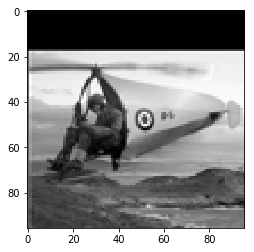

In [13]:
plt.imshow(orig3[0,:,:], cmap='gray')
plt.show()

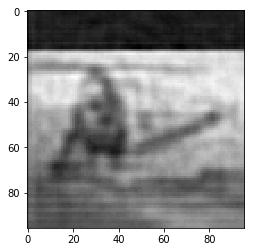

In [14]:
plt.imshow(recon3[0,:,:], cmap='gray')
plt.show()

In [23]:
recon3

array([[[-6.29760027e+00,  1.23607826e+01,  1.32816257e+01, ...,
          3.81907654e+00,  7.14155769e+00,  5.02264678e-01],
        [-1.48800025e-02,  1.73841972e+01,  1.75641632e+01, ...,
          4.40153217e+00,  8.15123177e+00,  7.77709627e+00],
        [-3.41075802e+00,  1.32618361e+01,  1.54706583e+01, ...,
          3.08505464e+00,  5.16450071e+00,  3.57275844e+00],
        ...,
        [ 5.37676201e+01,  6.17542686e+01,  6.34751320e+01, ...,
          1.11892685e+02,  1.08445450e+02,  1.06921028e+02],
        [ 5.22864761e+01,  6.74624481e+01,  6.45662308e+01, ...,
          1.08689178e+02,  1.09744553e+02,  1.10365234e+02],
        [ 4.91253853e+01,  6.30087395e+01,  6.29470139e+01, ...,
          1.06298912e+02,  1.07773232e+02,  1.09144661e+02]],

       [[ 2.94614172e+00,  1.03713770e+01,  6.36286545e+00, ...,
         -4.62760496e+00, -8.50239372e+00, -1.90961800e+01],
        [ 4.11210155e+00,  5.92924023e+00,  4.23941755e+00, ...,
          6.50525153e-01, -5.11221552e

In [18]:
x = recon3[0,:,:]*0.5 + orig3[0,:,:]

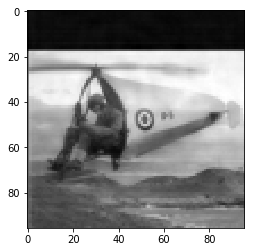

In [19]:
plt.imshow(x, cmap='gray')
plt.show()

In [18]:
def _FSpecialGauss(size, sigma):
    radius = size // 2
    offset = 0.0
    start, stop = -radius, radius + 1
    if size % 2 == 0:
        offset = 0.5
        stop -= 1
    x, y = np.mgrid[offset + start:stop, offset + start:stop]
    assert len(x) == size
    g = np.exp(-((x**2 + y**2)/(2.0 * sigma**2)))
    return g / g.sum()

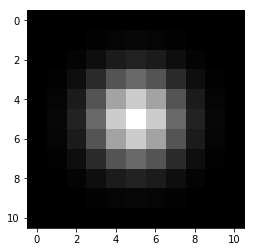

In [31]:
demoGaussFilter = _FSpecialGauss(11,1.5)
plt.imshow(demoGaussFilter, cmap='gray')
plt.show()

In [37]:
downsample_filter = np.ones((2, 2)) / 4.0

In [38]:
downsample_filter

array([[0.25, 0.25],
       [0.25, 0.25]])

In [68]:
im1 = orig3[0,:,:]
im2 = recon3[0,:,:]

In [77]:
filtered = [convolve(im, downsample_filter, mode='reflect')
                for im in [im1, im2]]
im1, im2 = [x[::2, ::2] for x in filtered]

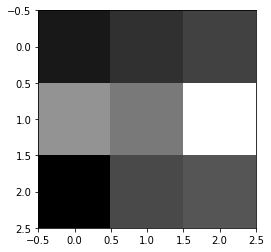

In [78]:
plt.imshow(im1, cmap='gray')
plt.show()

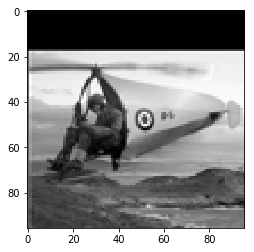

In [53]:
plt.imshow(orig3[0,:,:], cmap='gray')
plt.show()

In [4]:
res = tf_ms_ssim.MultiScaleSSIM(np.reshape(orig_500[0,:,:], [1,96,96,1]), np.reshape(recon_500[0,:,:], [1,96,96,1]))

(1, 96, 96, 1) (2, 1, 96, 96, 1)
(1, 48, 48, 1) (2, 1, 48, 48, 1)
(1, 24, 24, 1) (2, 1, 24, 24, 1)
(1, 12, 12, 1) (2, 1, 12, 12, 1)
(1, 6, 6, 1) (2, 1, 6, 6, 1)


/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [24]:
msssim_res = []
for ii in range(500):
    res = tf_ms_ssim.MultiScaleSSIM(np.reshape(orig_500[ii,:,:], [1,96,96,1]), np.reshape(recon_500[ii,:,:], [1,96,96,1]))
    msssim_res.append(res)

In [25]:
np.mean(msssim_res), np.var(msssim_res)

(0.90540535851504189, 0.00087015930517558306)

In [26]:
np.savetxt('msssimAnalytic500.csv', msssim_res)

In [5]:
data_path = '/home/dirty_mike/Dropbox/github/image_quality_analysis/data/sample_data/'
train_features, train_target, test_features, test_target = iqa.load_data(local=True, path=data_path)

In [7]:
train_features.shape

(500, 96, 96, 4)

In [ ]:
for ii in range(0,86):
    for jj in range(0,86):
        